Preprocess your data so that you can feed it into ANN models.



In [1]:
#load mnistfashion dataset
!pip install -q -U tensorflow>=1.8.0
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [2]:
#import additional libaries
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [3]:
input_dim = 784  # 28*28
output_dim = nb_classes = 10
batch_size = 128
nb_epoch = 20

X_train = x_train.reshape(60000, input_dim)
X_test = x_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [4]:
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

Try different ANN models and train them on your training set. You can play with the following:

Number of layers
Activation functions of the layers
Number of neurons in the layers
Different batch sizes during training

In [5]:
#I am going to start with a 3, and 5 layer deep learning model using sgd  optimizer and softmax activation
model = Sequential()
# our first dense layer
model.add(Dense(32, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(16, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

In [6]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 3s 2ms/step - loss: 1.8595 - accuracy: 0.3757
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.8673 - accuracy: 0.7019
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.6801 - accuracy: 0.7596
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.6029 - accuracy: 0.7898
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5616 - accuracy: 0.8046
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5250 - accuracy: 0.8189
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5057 - accuracy: 0.8248
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4923 - accuracy: 0.8286
Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4795 - accuracy: 0.8320
Epoch 10/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4692 - accuracy: 0.8384

In [8]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.4444347620010376
Test accuracy: 0.8428999781608582


This model has a 84% accuracy, lets try more hidden layers

In [9]:
model = Sequential()
# our first dense layer
model.add(Dense(1024, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(512, activation="relu"))
# our third dense layer
model.add(Dense(256, activation="relu"))
# our fourth dense layer
model.add(Dense(128, activation="relu"))
# our fifth dense layer
model.add(Dense(64, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

In [10]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 1.5703 - accuracy: 0.5036
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.6043 - accuracy: 0.7849
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5147 - accuracy: 0.8197
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4684 - accuracy: 0.8356
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4389 - accuracy: 0.8455
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4221 - accuracy: 0.8518
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3987 - accuracy: 0.8602
Epoch 8/20
469/469 [==============================] - 2s 3ms/step - loss: 0.3898 - accuracy: 0.8632
Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3811 - accuracy: 0.8669
Epoch 10/20
469/469 [==============================] - 2s 3ms/step - loss: 0.3641 - accuracy: 0.8717

In [12]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.3578108847141266
Test accuracy: 0.8701000213623047


With more layers the accuracy improved by a 4%, lets visualize it

In [13]:
import pandas as pd

In [14]:
report = df = pd.DataFrame(history.history)

report.tail()

,loss,accuracy
15,0.316748,0.885967
16,0.307494,0.890117
17,0.304166,0.890333
18,0.296323,0.893283
19,0.293008,0.893600


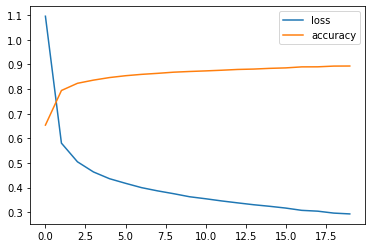

In [15]:
df[['loss', 'accuracy']].plot()

Accuracy has slight increase after 3rd epoch, and loss drops in the first 2 apoch the most then little by little

In [16]:
#Now I am going to do another 3 and 5 layer model, with adam optimizer and softmax activation, and increase the nerun numbers

model = Sequential()
# our first dense layer
model.add(Dense(128, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(512, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history_new = model.fit(X_train, Y_train, batch_size=batch_size, epochs=30, verbose=1)history_new = model.fit(X_train, Y_train, batch_size=batch_size, epochs=30, verbose=1)

Epoch 1/30
469/469 [==============================] - 1s 3ms/step - loss: 0.1018 - accuracy: 0.9609
Epoch 2/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0978 - accuracy: 0.9622
Epoch 3/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0933 - accuracy: 0.9649
Epoch 4/30
469/469 [==============================] - 1s 2ms/step - loss: 0.0928 - accuracy: 0.9645
Epoch 5/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0867 - accuracy: 0.9669
Epoch 6/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0851 - accuracy: 0.9678
Epoch 7/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0795 - accuracy: 0.9703
Epoch 8/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0807 - accuracy: 0.9698
Epoch 9/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0719 - accuracy: 0.9726
Epoch 10/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0781 - accuracy: 0.9699

Changing the loss function to Adams, and increasing the number of neurons made a signifficant differnce, the accuracy of this model is 98%

In [28]:
report = df = pd.DataFrame(history_new.history)

report.tail()

,loss,accuracy
25,0.054153,0.980050
26,0.045951,0.982550
27,0.035445,0.986650
28,0.055451,0.980000
29,0.037980,0.986033


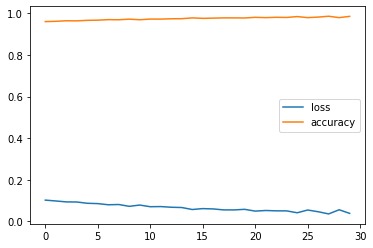

In [29]:
df[['loss', 'accuracy']].plot()

In [24]:
model = Sequential()
# our first dense layer
model.add(Dense(1024, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(512, activation="relu"))
# our third dense layer
model.add(Dense(256, activation="relu"))
# our fourth dense layer
model.add(Dense(128, activation="relu"))
# our fifth dense layer
model.add(Dense(64, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
history_new2 = model.fit(X_train, Y_train, batch_size=batch_size, epochs=30, verbose=1)

Epoch 1/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1786 - accuracy: 0.9327
Epoch 2/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1709 - accuracy: 0.9352
Epoch 3/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1663 - accuracy: 0.9362
Epoch 4/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1607 - accuracy: 0.9384
Epoch 5/30
469/469 [==============================] - 1s 3ms/step - loss: 0.1532 - accuracy: 0.9416
Epoch 6/30
469/469 [==============================] - 1s 3ms/step - loss: 0.1474 - accuracy: 0.9436
Epoch 7/30
469/469 [==============================] - 1s 3ms/step - loss: 0.1477 - accuracy: 0.9439
Epoch 8/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1378 - accuracy: 0.9456
Epoch 9/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1356 - accuracy: 0.9472
Epoch 10/30
469/469 [==============================] - 1s 3ms/step - loss: 0.1327 - accuracy: 0.9484

In [31]:
report = df = pd.DataFrame(history_new2.history)

report.tail()

,loss,accuracy
25,0.081801,0.968750
26,0.078328,0.970017
27,0.078484,0.969683
28,0.076462,0.971683
29,0.074567,0.970600


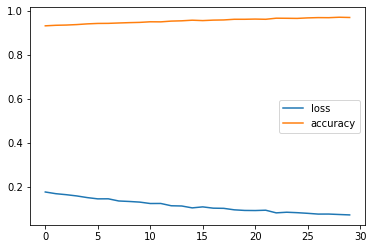

In [32]:
df[['loss', 'accuracy']].plot()

At this point our model did improve by being more complex. Overall the best model is 3 layer, using adam for loss function and softmax for optimazitation